<a href="https://colab.research.google.com/github/egonik-unlp/labo/blob/main/notebooks/eems_seminario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/egonik-unlp/labo.git
%cd /content/labo/2021/eem_dmso

Cloning into 'labo'...
remote: Enumerating objects: 884, done.
remote: Counting objects: 100% (884/884), done.
remote: Compressing objects: 100% (654/654), done.
remote: Total 884 (delta 291), reused 782 (delta 203), pack-reused 0
Receiving objects: 100% (884/884), 39.13 MiB | 20.99 MiB/s, done.
Resolving deltas: 100% (291/291), done.
/content/labo/2021/eem_dmso


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import os

In [1]:
reemplazos={
    "90":"MOF-I",
    "170":"MOF-II",
    "230":"MOF-III"
}

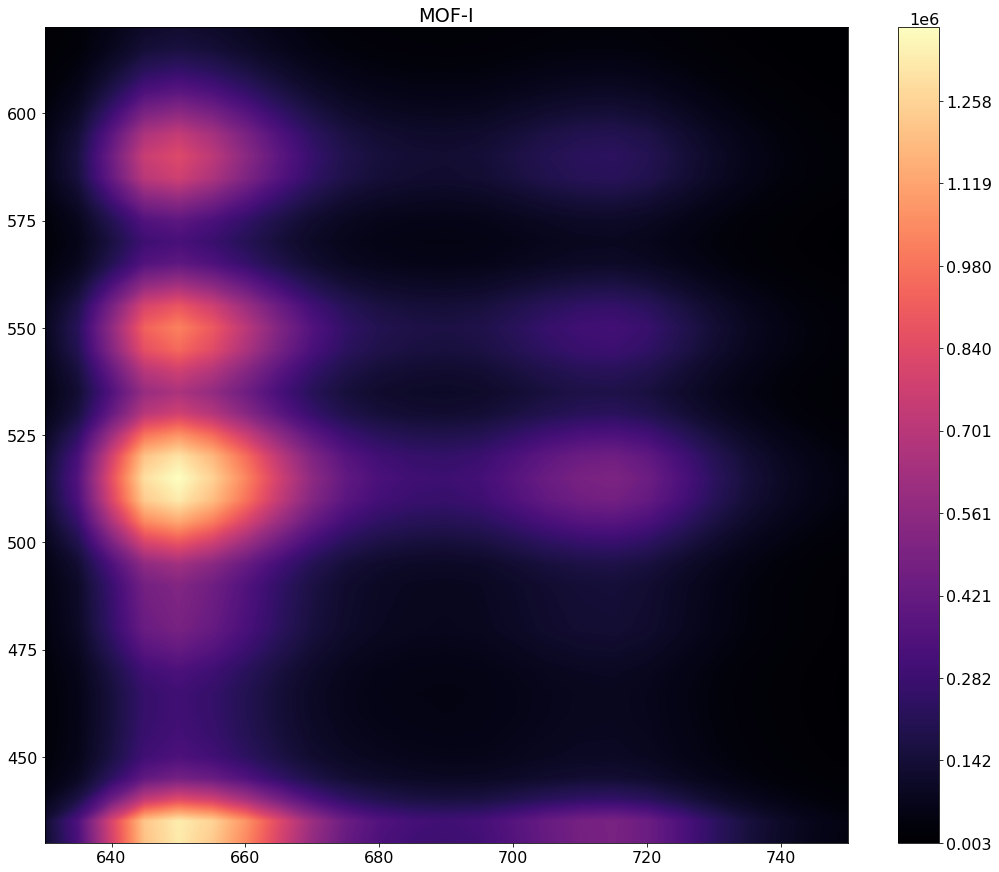

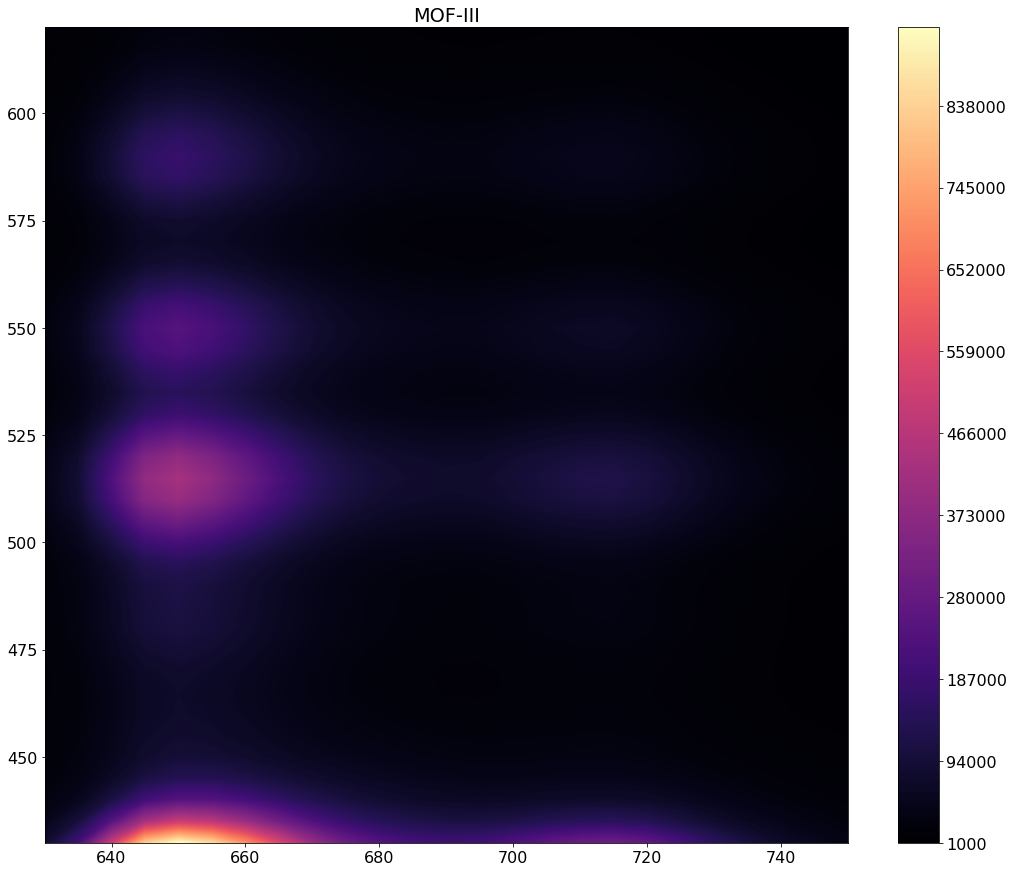

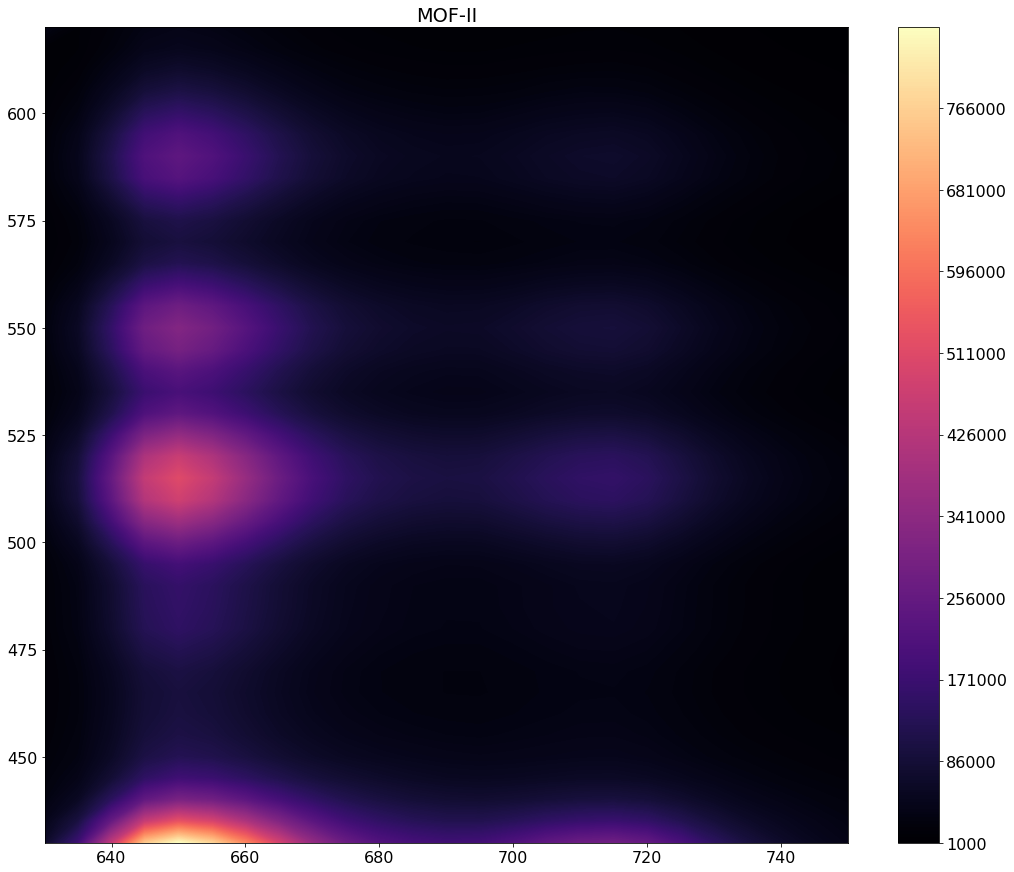

In [6]:
plt.rcParams.update({
    "font.size":16
})
for file in os.listdir():
  if '.csv'== file[-4:]:
    eem=pd.read_csv(file) 
    data=eem.pivot("EX wavelength", "EM wavelength", "A1c/R1c")
    fig, ax = plt.subplots(1,1,figsize=(18,15))
    yy,xx = np.meshgrid(data.index,data.columns)
    plot=ax.contourf(xx,yy,data.to_numpy().T, cmap="magma", levels=1000)
    # ax.set_xticklabels(data.columns)
    # ax.set_yticklabels(data.index)
    plt.title(reemplazos[file[:-4]])
    plt.colorbar(plot)
    plt.savefig("/content/plot_eem_mof{}.png".format(file[:-4]))
    plt.show()

In [ ]:
plt.surface(*convert_to_numpy(file), cmap='viridis')

AttributeError: ignored

In [ ]:
zz=convert_to_numpy(file)[2]

In [ ]:
np.unique(eem.to_numpy()[:,0]).shape

In [ ]:
eem.to_numpy()[:,2].reshape(25,39)

In [ ]:
def convert_to_numpy(path:str) -> tuple:
  eem=pd.read_csv(path)
  eem_mat=eem.to_numpy()
  emision=np.unique(eem["EM wavelength"])
  excitacion=np.unique(eem["EX wavelength"])
  xx,yy=np.meshgrid(emision, excitacion)
  zz=np.vstack(np.split(eem_mat[:,2], excitacion.shape[0]))
  return xx,yy,zz



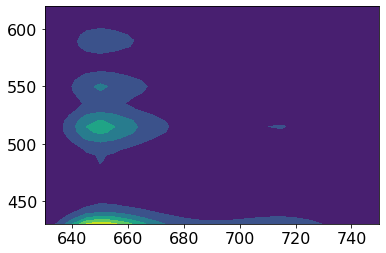

In [ ]:
tpl=convert_to_numpy('170.csv')
plt.contourf(*tpl)

In [ ]:
emission_wavelenghts=len(np.unique(eem.to_numpy()[:,1]))
measurements=eem.shape[1]

In [ ]:
np.arange(start= measurements ,stop=eem.shape[0], step=emission_wavelenghts)

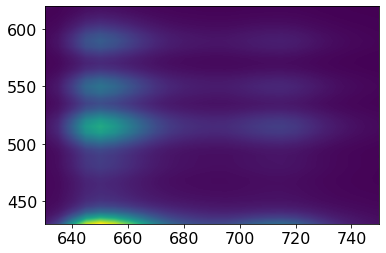

In [ ]:
eem_mat=eem.to_numpy()
emision=np.unique(eem["EX wavelength"])
excitacion=np.unique(eem["EM wavelength"])
xx,yy=np.meshgrid(excitacion, emision)
zz=np.vstack(np.split(eem_mat[:,2], emision.shape[0]))
plt.contourf(xx,yy,zz, levels=1000)

In [ ]:
import ipywidgets as widgets

slider = widgets.IntSlider(20, min=0, max=100)
slider

In [ ]:
import altair as alt
import ipywidgets as widgets
from vega_datasets import data

source = data.stocks()

stock_picker = widgets.SelectMultiple(
    options=source.symbol.unique(),
    value=list(source.symbol.unique()),
    description='Symbols')

# The value of symbols will come from the stock_picker.
@widgets.interact(symbols=stock_picker)
def render(symbols):
  selected = source[source.symbol.isin(list(symbols))]

  return alt.Chart(selected).mark_line().encode(
      x='date',
      y='price',
      color='symbol',
      strokeDash='symbol',
  )

In [ ]:
# load an example dataset
from vega_datasets import data
cars = data.cars()

# plot the dataset, referencing dataframe column names
import altair as alt
alt.Chart(cars).mark_bar().encode(
  x=alt.X('Miles_per_Gallon', bin=True),
  y='count()',
)

In [ ]:
# load an example dataset
from vega_datasets import data
cars = data.cars()

# plot the dataset, referencing dataframe column names
import altair as alt
alt.Chart(cars).mark_bar().encode(
  x=alt.X('Miles_per_Gallon', bin=True),
  y='count()',
  color='Origin'
)

In [ ]:
# load an example dataset
from vega_datasets import data
cars = data.cars()

import altair as alt

interval = alt.selection_interval()

points = alt.Chart(cars).mark_point().encode(
  x='Horsepower',
  y='Miles_per_Gallon',
  color=alt.condition(interval, 'Origin', alt.value('lightgray'))
).properties(
  selection=interval
)

histogram = alt.Chart(cars).mark_bar().encode(
  x='count()',
  y='Origin',
  color='Origin'
).transform_filter(interval)

points & histogram